In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 4000,eta0 = 0.1,random_state=0)
ppn.fit(X_train_std,y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=4000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)

print('Misclassified samples :%d ' % (y_test != y_pred).sum())

Misclassified samples :5 


In [6]:
from sklearn.metrics import accuracy_score

print('Accuracy score : %.2f' % accuracy_score(y_test,y_pred))

Accuracy score : 0.89


In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, 
                    test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidths=1, marker='o', 
                s=55, label='test set')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


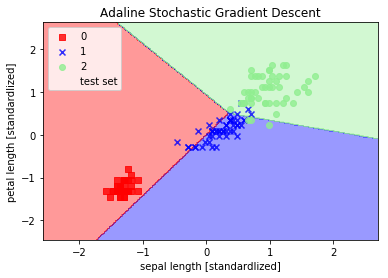

In [8]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn,test_idx = range(105,150))

plt.title('Adaline Stochastic Gradient Descent')
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()

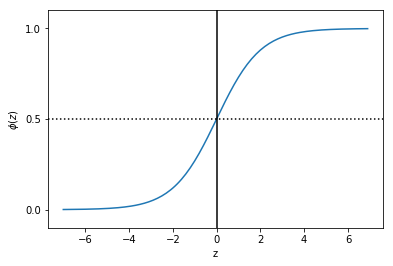

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)

phi_z = sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0,ls='dotted')

plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)

plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


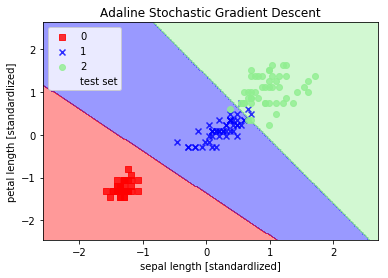

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std,y_train)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=lr,test_idx = range(105,150))

plt.title('Adaline Stochastic Gradient Descent')
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()

In [11]:
lr.predict_proba(X_test_std)

array([[6.51335792e-16, 4.95077314e-04, 9.99504923e-01],
       [1.32640538e-04, 9.99818817e-01, 4.85423440e-05],
       [9.99948083e-01, 5.19168039e-05, 2.89755641e-18],
       [3.79330985e-16, 1.18063223e-04, 9.99881937e-01],
       [9.99921056e-01, 7.89436666e-05, 7.52757094e-18],
       [1.95972890e-20, 1.73749925e-06, 9.99998263e-01],
       [9.99908391e-01, 9.16094804e-05, 6.87845585e-18],
       [4.47997927e-08, 8.83125850e-01, 1.16874105e-01],
       [8.14992933e-08, 9.10438731e-01, 8.95611875e-02],
       [6.86252027e-06, 9.99403940e-01, 5.89197752e-04],
       [3.84627242e-10, 1.22830323e-01, 8.77169677e-01],
       [1.12211798e-07, 9.56627690e-01, 4.33721973e-02],
       [9.69522133e-07, 9.89217832e-01, 1.07811987e-02],
       [7.15933975e-08, 9.28107927e-01, 7.18920010e-02],
       [1.28709854e-07, 9.45556739e-01, 5.44431319e-02],
       [9.99980651e-01, 1.93486780e-05, 4.69823844e-19],
       [1.12211798e-07, 9.56627690e-01, 4.33721973e-02],
       [3.43858267e-06, 9.97815

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


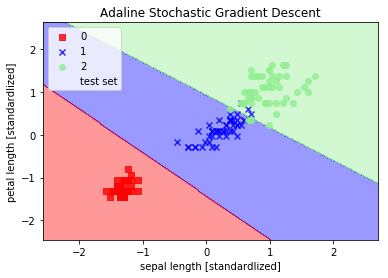

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1.0, random_state=0)

svm.fit(X_train_std,y_train)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=svm,test_idx = range(105,150))

plt.title('Adaline Stochastic Gradient Descent')
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()

In [13]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

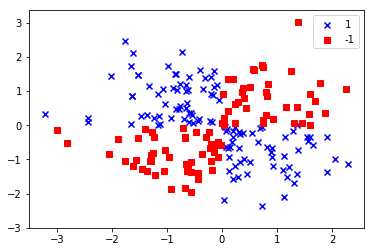

In [14]:
np.random.randn(0)

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)

y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor == 1,0],X_xor[y_xor == 1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor == -1,0],X_xor[y_xor == -1,1],c='r',marker='s',label='-1')

plt.ylim(-3.0)
plt.legend()
plt.show()




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


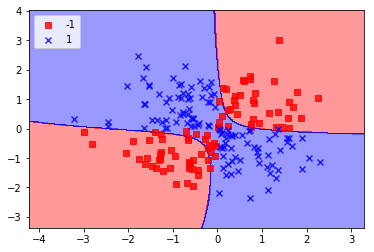

In [15]:
svm = SVC(kernel = 'rbf',random_state = 0, gamma=0.10, C=10.0)

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor,y_xor,classifier =svm)

plt.legend(loc='upper left')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


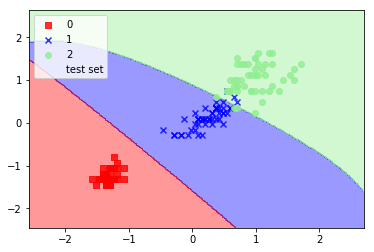

In [16]:
svm = SVC(kernel = 'rbf',random_state = 0, gamma=0.20, C=1.0)

svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,y_combined,classifier =svm,test_idx=range(105,150))

plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


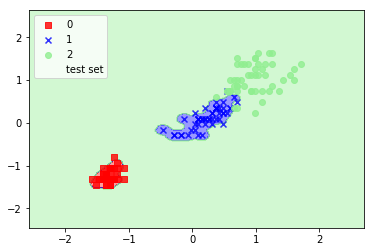

In [17]:
svm = SVC(kernel = 'rbf',random_state = 0, gamma=100.0, C=1.0)

svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,y_combined,classifier =svm,test_idx=range(105,150))

plt.legend(loc='upper left')
plt.show()

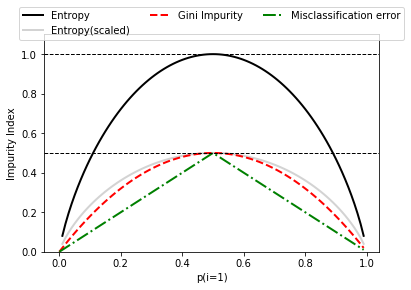

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1-p))

def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)

ent = [entropy(p) if p != 0 else None for p in x ]

sc_ent = [e * 0.5 if e else None for e in ent]

err = [error(i) for i in x ]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x),err],
                         ['Entropy','Entropy(scaled)','Gini Impurity','Misclassification error'],
                         ['-','-','--','-.'],
                         ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
    
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()    
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


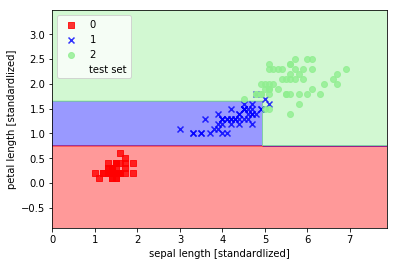

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0)

tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier = tree,test_idx=range(105,150) )
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()

In [8]:
import graphviz

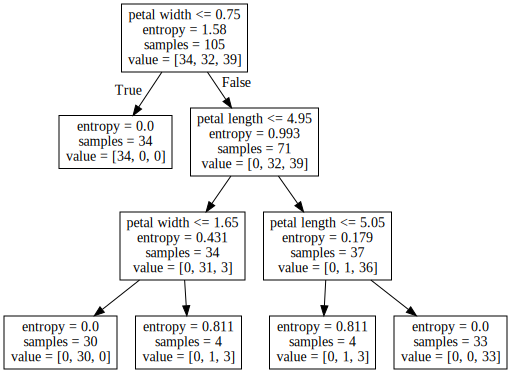

In [10]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,out_file=None,feature_names=['petal length','petal width'])

graph = graphviz.Source(dot_data)

graph

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


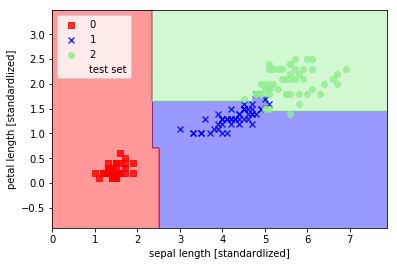

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1,n_jobs=2)

forest.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier = forest,test_idx=range(105,150) )
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


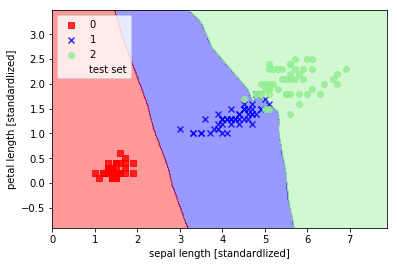

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

knn.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier = knn,test_idx=range(105,150) )
plt.xlabel('sepal length [standardlized]')
plt.ylabel('petal length [standardlized]')

plt.legend(loc = 'upper left')
plt.show()